In [1]:
import generator

import numpy as np

import matplotlib.pyplot as plt

from skopt.plots import plot_gaussian_process
from skopt import Optimizer

/opt/homebrew/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
bins_file = open('../exp_data/na49/binning.bin', 'r')

In [10]:
bins = []

for num, line in enumerate(bins_file.readlines()):

    if num % 2 == 0:
        
        a = line.split('|')

        for bin in a:

            bin = bin.replace('(', '').replace(')', '').replace(' ', '')
            bins.append(list(map(float, bin.split(','))))

bins = np.array(bins)

bins_file.close()

In [11]:
import pandas as pd

ids = [211, 321, -211, -321]

refs = {}

for id in ids:
    
    refs[id] = pd.read_csv(f'../exp_data/na49/{id}.csv')

In [5]:
inst = {
    'Print:quiet': 'on',

    'Beams:frameType': '2',

    'Beams:idA': '2212',
    'Beams:idB': '2212',

    'Beams:eA': '158',
    'Beams:eB': '0',

    'SoftQCD:all': 'on',

    'Tune:pp': '1',

    'SigmaDiffractive:dampen': 'on',
    'SpaceShower:phiIntAsym': 'on',
    'SpaceShower:phiPolAsym': 'on',
    'SpaceShower:rapidityOrder': 'on',
    'SpaceShower:rapidityOrderMPI': 'on',
    'SpaceShower:samePTasMPI': 'off',
    'TimeShower:dampenBeamRecoil': 'on',
    'TimeShower:phiPolAsym': 'on',

    'MultipartonInteractions:ecmRef': '1800',
    }

In [6]:
optim_param = 'MultipartonInteractions:ecmRef'

In [7]:
def objective(x, n_events, refs, agregate=None):

    new_val = x[0]

    inst[optim_param] = f'{new_val}'

    data, sigma = generator.generate(n_events, inst, bins)
    res =  generator.get_score(data, sigma, n_events, bins, refs, generator.chi_square, agregate)

    return res

> ## Error evaluation

In [8]:
stat = 20
ns = [5, 6, 7]

res_pi = {}
res_k = {}

In [9]:
for n in ns:

    res_pi[n] = []
    res_k[n] = []

    print(f'Evuluate statistics for 10^{n} events:')
    
    for _ in range(stat):

        pi, k = objective([5576.0], int(10 ** n), {211: refs[211], 321: refs[321]})

        res_pi[n].append(pi)
        res_k[n].append(k)

    print('\n')

Evuluate statistics for 10^5 events:


100%|██████████| 100000/100000 [00:13<00:00, 7665.38it/s]




Evuluate statistics for 10^6 events:


100%|██████████| 1000000/1000000 [02:04<00:00, 8004.37it/s]




Evuluate statistics for 10^7 events:


100%|██████████| 10000000/10000000 [22:07<00:00, 7533.89it/s]


In [10]:
print('pi-mesons')

for n in ns:

    print(f'For 10^{n} events\n\
        Mean value: {np.mean(res_pi[n]):.5}\n\
        STD: {np.std(res_pi[n]):.5}\n')

pi-mesons
For 10^5 events
        Mean value: 1170.5
        STD: 21.034

For 10^6 events
        Mean value: 1084.8
        STD: 8.2865

For 10^7 events
        Mean value: 1056.8
        STD: 3.793



In [11]:
print('K-mesons')

for n in ns:

    print(f'For 10^{n} events\n\
        Mean value: {np.mean(res_k[n]):.5}\n\
        STD: {np.std(res_k[n]):.5}\n')

K-mesons
For 10^5 events
        Mean value: 326.74
        STD: 24.835

For 10^6 events
        Mean value: 295.97
        STD: 7.8396

For 10^7 events
        Mean value: 278.48
        STD: 3.3335



> ## Bins distribution test

In [12]:
def f(y_hat, y, y_hat_err, y_err):

    return (y_hat - y) / (y_hat_err ** 2 + y_err ** 2) ** 0.5

In [13]:
n_events = int(1e5)

In [14]:
per_bin_reses = []
mask = 1

for i in range(100):

    data, sigma = generator.generate(n_events, inst, bins)
    xsect, err = generator.xsect_calc(data, sigma, n_events, bins)
    res = generator.calc_metric(f, xsect, err, refs[211], bins, 211)
    
    per_bin_reses.append(res)

    mask = mask * (np.where(np.isnan(res), False, True))

100%|██████████| 100000/100000 [00:12<00:00, 8026.40it/s]


/var/folders/9j/cllsf0815jl9bm0yjv_8cm400000gn/T/ipykernel_3595/1228110364.py:3: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]


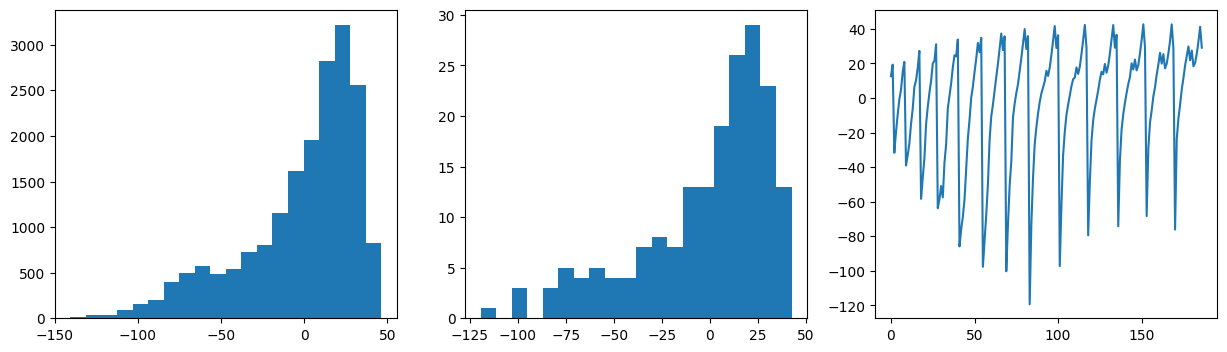

In [15]:
plt.figure(figsize=(15, 4))

per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]
plt.subplot(1, 3, 1)
plt.hist(np.concatenate(per_bin_clean), bins=20)

per_bin_avg = per_bin_clean.mean(axis=0)
plt.subplot(1, 3, 2)
plt.hist(per_bin_avg, bins=20)

plt.subplot(1, 3, 3)
plt.plot(per_bin_avg);

In [16]:
n_events = int(1e6)

In [17]:
per_bin_reses = []
mask = 1

for i in range(100):

    data, sigma = generator.generate(n_events, inst, bins)
    xsect, err = generator.xsect_calc(data, sigma, n_events, bins)
    res = generator.calc_metric(f, xsect, err, refs[211], bins, 211)
    
    per_bin_reses.append(res)

    mask = mask * (np.where(np.isnan(res), False, True))

100%|██████████| 1000000/1000000 [02:05<00:00, 7996.27it/s]


/var/folders/9j/cllsf0815jl9bm0yjv_8cm400000gn/T/ipykernel_3595/1228110364.py:3: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]


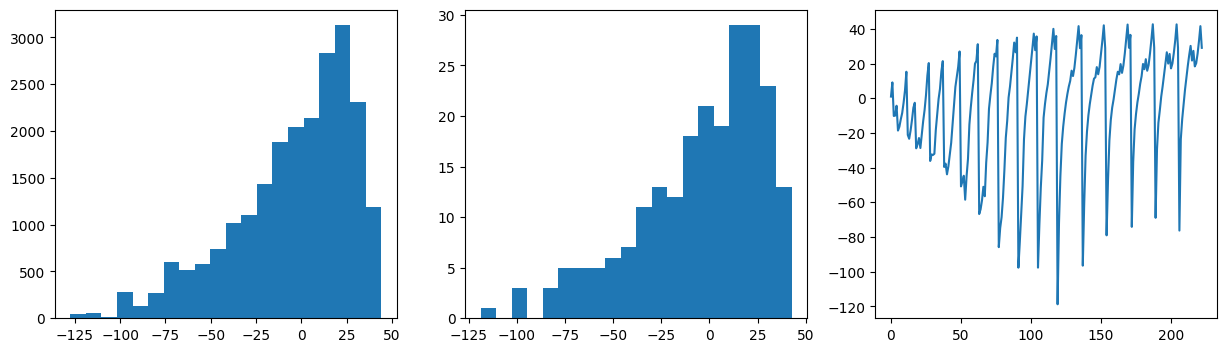

In [18]:
plt.figure(figsize=(15, 4))

per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]
plt.subplot(1, 3, 1)
plt.hist(np.concatenate(per_bin_clean), bins=20)

per_bin_avg = per_bin_clean.mean(axis=0)
plt.subplot(1, 3, 2)
plt.hist(per_bin_avg, bins=20)

plt.subplot(1, 3, 3)
plt.plot(per_bin_avg);

In [19]:
n_events = int(1e7)

In [20]:
per_bin_reses = []
mask = 1

for i in range(100):

    data, sigma = generator.generate(n_events, inst, bins)
    xsect, err = generator.xsect_calc(data, sigma, n_events, bins)
    res = generator.calc_metric(f, xsect, err, refs[211], bins, 211)
    
    per_bin_reses.append(res)

    mask = mask * (np.where(np.isnan(res), False, True))

100%|██████████| 10000000/10000000 [20:46<00:00, 8019.49it/s]


/var/folders/9j/cllsf0815jl9bm0yjv_8cm400000gn/T/ipykernel_3595/1228110364.py:3: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]


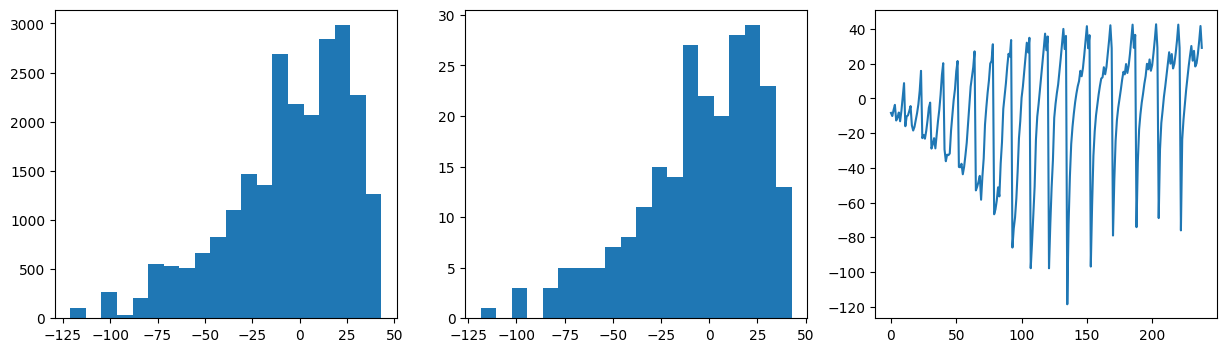

In [22]:
plt.figure(figsize=(15, 4))

per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]
plt.subplot(1, 3, 1)
plt.hist(np.concatenate(per_bin_clean), bins=20)

per_bin_avg = per_bin_clean.mean(axis=0)
plt.subplot(1, 3, 2)
plt.hist(per_bin_avg, bins=20)

plt.subplot(1, 3, 3)
plt.plot(per_bin_avg);

In [154]:
n = 10000
df, sigma = generator.generate(n, inst, bins)

100%|██████████| 10000/10000 [00:01<00:00, 7822.61it/s]


In [157]:
for n in [10, 100, 1000, 10000, 100000]:
    
    stat = []
    
    for _ in range(20):
        
        df, sigma = generator.generate(n, inst, bins)
        stat.append(np.sum([df['id'] == 211]) / n)

    print(f'n={n}, mean={np.mean(stat)}, std={np.std(stat)}')

100%|██████████| 10/10 [00:00<00:00, 8090.86it/s]


n=10, mean=0.42000000000000004, std=0.15362291495737218


100%|██████████| 100/100 [00:00<00:00, 6415.17it/s]


n=100, mean=0.406, std=0.0637495098020369


100%|██████████| 1000/1000 [00:00<00:00, 7579.20it/s]


n=1000, mean=0.4208, std=0.016296011782028143


100%|██████████| 10000/10000 [00:01<00:00, 7506.35it/s]


n=10000, mean=0.41237500000000005, std=0.0075189011830187


100%|██████████| 100000/100000 [00:12<00:00, 7875.35it/s]


n=100000, mean=0.4138695, std=0.002244287136263988


In [31]:
def objective(x, n_events, refs, agregate=None):

    new_val = x[0]

    inst[optim_param] = f'{new_val}'

    data, sigma = generator.generate(n_events, inst, bins)
    res =  generator.get_score(data, sigma, n_events, bins, refs, generator.chi_square_fair, agregate)

    return res

In [32]:
stat = 20
ns = [5, 6, 7]

res_pi = {}
res_k = {}

In [33]:
for n in ns:

    res_pi[n] = []
    res_k[n] = []

    print(f'Evuluate statistics for 10^{n} events:')
    
    for _ in range(stat):

        pi, k = objective([5576.0], int(10 ** n), {211: refs[211], 321: refs[321]})

        res_pi[n].append(pi)
        res_k[n].append(k)

    print('\n')

Evuluate statistics for 10^5 events:


100%|██████████| 100000/100000 [00:12<00:00, 7756.41it/s]




Evuluate statistics for 10^6 events:


100%|██████████| 1000000/1000000 [02:05<00:00, 7953.60it/s]




Evuluate statistics for 10^7 events:


100%|██████████| 10000000/10000000 [20:56<00:00, 7957.64it/s]


In [34]:
print('pi-mesons')

for n in ns:

    print(f'For 10^{n} events\n\
        Mean value: {np.mean(res_pi[n]):.5}\n\
        STD: {np.std(res_pi[n]):.5}\n')

pi-mesons
For 10^5 events
        Mean value: 0.08068
        STD: 0.0053542

For 10^6 events
        Mean value: 0.13814
        STD: 0.0033083

For 10^7 events
        Mean value: 0.15235
        STD: 0.0013609



In [35]:
print('K-mesons')

for n in ns:

    print(f'For 10^{n} events\n\
        Mean value: {np.mean(res_k[n]):.5}\n\
        STD: {np.std(res_k[n]):.5}\n')

K-mesons
For 10^5 events
        Mean value: 0.13496
        STD: 0.016995

For 10^6 events
        Mean value: 0.16074
        STD: 0.0085463

For 10^7 events
        Mean value: 0.19838
        STD: 0.0037214



In [21]:
def chi_square_fair_sqrt(y_hat, y, y_hat_err, y_err):

    fairness = y_err / y
    chi_square = (y_hat - y) / (y_hat_err ** 2 + y_err ** 2) ** 0.5

    return chi_square * fairness

In [22]:
n_events = int(1e5)

In [23]:
per_bin_reses = []
mask = 1

for i in range(100):

    data, sigma = generator.generate(n_events, inst, bins)
    xsect, err = generator.xsect_calc(data, sigma, n_events, bins)
    res = generator.calc_metric(chi_square_fair_sqrt, xsect, err, refs[211], bins, 211)
    
    per_bin_reses.append(res)

    mask = mask * (np.where(np.isnan(res), False, True))

100%|██████████| 100000/100000 [00:13<00:00, 7572.51it/s]


/var/folders/9j/cllsf0815jl9bm0yjv_8cm400000gn/T/ipykernel_30161/1228110364.py:3: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]


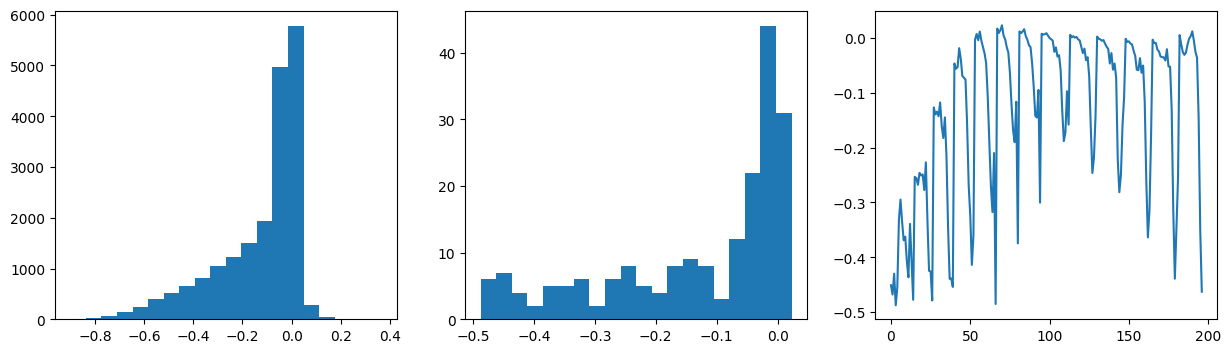

In [24]:
plt.figure(figsize=(15, 4))

per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]
plt.subplot(1, 3, 1)
plt.hist(np.concatenate(per_bin_clean), bins=20)

per_bin_avg = per_bin_clean.mean(axis=0)
plt.subplot(1, 3, 2)
plt.hist(per_bin_avg, bins=20)

plt.subplot(1, 3, 3)
plt.plot(per_bin_avg);

In [25]:
n_events = int(1e6)

In [26]:
per_bin_reses = []
mask = 1

for i in range(100):

    data, sigma = generator.generate(n_events, inst, bins)
    xsect, err = generator.xsect_calc(data, sigma, n_events, bins)
    res = generator.calc_metric(chi_square_fair_sqrt, xsect, err, refs[211], bins, 211)
    
    per_bin_reses.append(res)

    mask = mask * (np.where(np.isnan(res), False, True))

100%|██████████| 1000000/1000000 [02:10<00:00, 7661.74it/s]


/var/folders/9j/cllsf0815jl9bm0yjv_8cm400000gn/T/ipykernel_30161/1228110364.py:3: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]


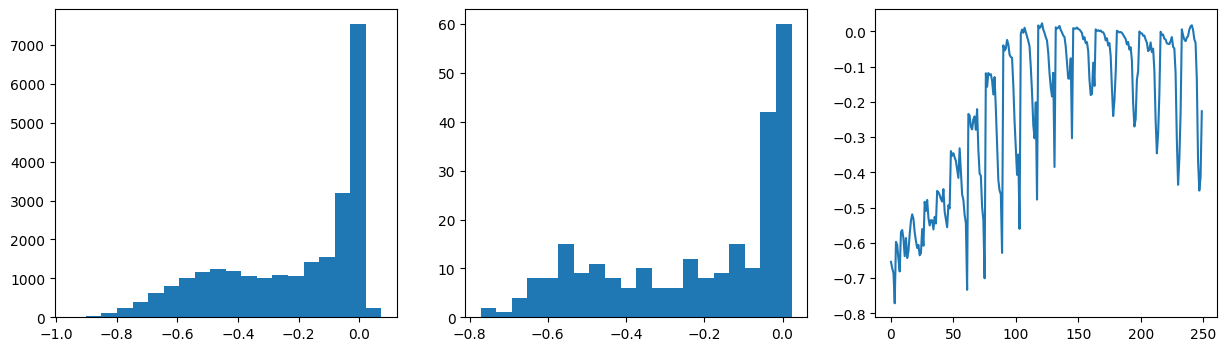

In [27]:
plt.figure(figsize=(15, 4))

per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]
plt.subplot(1, 3, 1)
plt.hist(np.concatenate(per_bin_clean), bins=20)

per_bin_avg = per_bin_clean.mean(axis=0)
plt.subplot(1, 3, 2)
plt.hist(per_bin_avg, bins=20)

plt.subplot(1, 3, 3)
plt.plot(per_bin_avg);

In [28]:
n_events = int(1e7)

In [29]:
per_bin_reses = []
mask = 1

for i in range(100):

    data, sigma = generator.generate(n_events, inst, bins)
    xsect, err = generator.xsect_calc(data, sigma, n_events, bins)
    res = generator.calc_metric(chi_square_fair_sqrt, xsect, err, refs[211], bins, 211)
    
    per_bin_reses.append(res)

    mask = mask * (np.where(np.isnan(res), False, True))

  0%|          | 0/10000000 [00:00<?, ?it/s]

100%|██████████| 10000000/10000000 [21:44<00:00, 7666.40it/s]


/var/folders/9j/cllsf0815jl9bm0yjv_8cm400000gn/T/ipykernel_30161/1228110364.py:3: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]


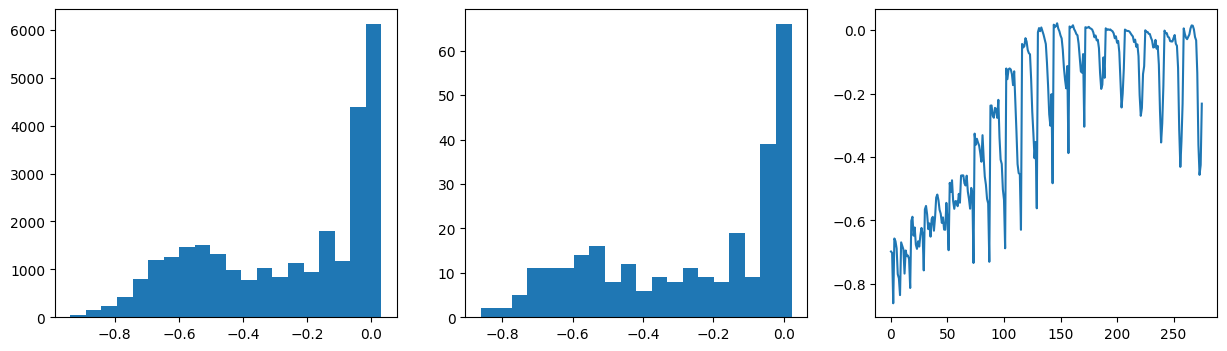

In [30]:
plt.figure(figsize=(15, 4))

per_bin_clean = np.array(per_bin_reses)[:, np.bool8(mask)]
plt.subplot(1, 3, 1)
plt.hist(np.concatenate(per_bin_clean), bins=20)

per_bin_avg = per_bin_clean.mean(axis=0)
plt.subplot(1, 3, 2)
plt.hist(per_bin_avg, bins=20)

plt.subplot(1, 3, 3)
plt.plot(per_bin_avg);

----------------------

In [1]:
import sys
sys.path.insert(0, '/opt/homebrew/Cellar/pythia/8.309/lib')
import pythia8


from tqdm import tqdm
import pandas as pd
import numpy as np


mp = 0.93827                                                           #proton mass
pz = 158.0                                                             #beam momentum
root_s = (2 * mp * (mp + (mp ** 2 + pz ** 2) ** 0.5)) ** 0.5           #sqrt(s)
norm = 3.141593 * root_s / 2                                           #normalization in new coordinats
sig_trig = 28.23                                                       #trigger cross section

In [2]:
def xsect_calc(data, sigma, n_events, bins):

    xsect = []
    err = []

    for bin in bins:

        xF = bin[0]
        pT = bin[1]

        dxF = bin[2]
        dpT = bin[3]

        mask_for_bin = (data['xF'] > xF - dxF / 2) * \
            (data['xF'] < xF + dxF / 2) * \
            (data['pT'] > pT - dpT / 2) * \
            (data['pT'] < pT + dpT / 2)

        dn = np.sum(mask_for_bin)

        dp3 = dxF * 2 * pT * dpT

        E = data[mask_for_bin]['E']

        xsect.append(E.mean() * (sigma / n_events) * (dn / dp3) / norm)
        err.append(E.std() * (sigma / n_events) * (dn / dp3) / norm)

    xsect = np.where(np.isnan(xsect), 0, xsect)
    err = np.where(np.isnan(err), 0, 0)

    return xsect, err

In [3]:
def chi_square(y_hat, y, y_hat_err, y_err):

    return (y_hat - y) ** 2 / (y_hat_err ** 2 + y_err ** 2)

def chi_square_fair(y_hat, y, y_hat_err, y_err):

    fairness = y_err ** 2 / y ** 2
    chi_square = (y_hat - y) ** 2 / (y_hat_err ** 2 + y_err ** 2)

    return chi_square * fairness

In [4]:
def per_bin_metric_calc(xsect, err, bins, ref, metric):

    active_bins = []
    res = []

    for num, bin in enumerate(bins):

        mask = (ref['xF'] == bin[0]) * (ref['pT'] == bin[1])

        if np.sum(mask) != 0:

            active_bins.append(num)
            
            y = ref['xsect'][mask].values[0]
            y_hat = xsect[num]

            y_err = ref['error'][mask].values[0]
            y_hat_err = err[num]

            res.append(metric(y, y_hat,
                              y_err, y_hat_err))
            
    return res, active_bins

In [5]:
def get_score(n_events, data, sigma, ref, bins, metric):

    xsect, err = xsect_calc(data, sigma, n_events, bins)
    res, active_bins = per_bin_metric_calc(xsect, err, bins, ref, metric)
    
    return res, active_bins

In [6]:
bins_file = open('../exp_data/na49/binning.bin', 'r')

In [7]:
bins = []

for num, line in enumerate(bins_file.readlines()):

    if num % 2 == 0:
        
        a = line.split('|')

        for bin in a:

            bin = bin.replace('(', '').replace(')', '').replace(' ', '')
            bins.append(list(map(float, bin.split(','))))

bins = np.array(bins)

bins_file.close()

In [16]:
ids = [211, 321, -211, -321]

refs = {}

for id in ids:
    
    refs[id] = pd.read_csv(f'../exp_data/na49/{id}.csv')

In [10]:
data6 = pd.read_csv('data/6.csv')

In [13]:
file = open('data/6.txt', 'r')
sigma6 = float(file.readline())
file.close()

In [178]:
data7 = pd.read_csv('data/7.csv')

In [179]:
file = open('data/7.txt', 'r')
sigma7 = float(file.readline())
file.close()

In [180]:
pp_score6, pp_ab6 = get_score(int(1e6), data6[data6.id == 211], sigma6, refs[211], bins, chi_square)

In [198]:
pp_score6_sampled, pp_ab6_sampled = get_score(int(0.1e6), data7[data7.id == 211].sample(frac=0.1/10, replace=False), sigma7, refs[211], bins, chi_square)

In [182]:
np.mean(pp_score6)

297.37903161393257

In [199]:
np.mean(pp_score6_sampled)

362.4583104825776

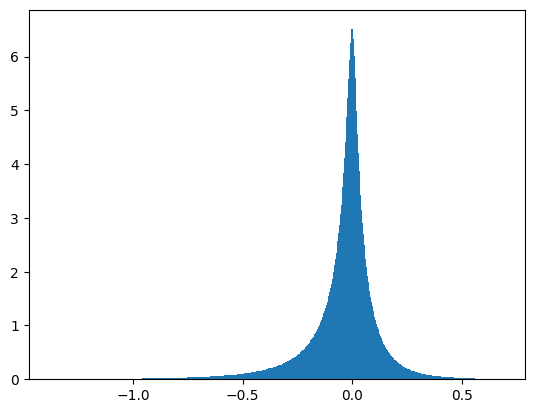

In [203]:
import matplotlib.pyplot as plt
plt.hist(data7[data7.id == 211].sample(frac=10/10, replace=False).xF, bins=1000, density=True);

In [204]:
(data7[data7.id == 211].sample(frac=10/10, replace=False).xF < 0).sum() / (data7[data7.id == 211].sample(frac=10/10, replace=False).xF > 0).sum()

1.3789844438444971

In [163]:
data7[data7.id == 211].sample(frac=0.001/10, replace=False).xF.median(), data7[data7.id == 211].sample(frac=0.01/10, replace=False).xF.mean()

(-0.0096838245236444, -0.03618653974674366)

In [ ]:
file = open('data/6.txt', 'r')
sigma6 = float(file.readline())
file.close()

In [5]:
frac = np.linspace(0.1, 1, 20)

In [6]:
data = pd.read_csv('data/data.csv')
sigma = float(open('data/sigma.txt', 'r').readline())

In [ ]:
per_bin_reses = []
mask = True

for f in frac:

    xsect, err = generator.xsect_calc(data[data['id'] == 211].sample(frac=f), sigma, int(1e7 * f), bins)
    res = generator.calc_metric(generator.chi_square, xsect, err, refs[211], bins, 211)

    per_bin_reses.append(res)
    mask = mask * (np.where(np.isnan(res), False, True))
        

In [ ]:


for i in range(100):

    data, sigma = generator.generate(n_events, inst, bins)
    xsect, err = generator.xsect_calc(data, sigma, n_events, bins)
    res = generator.calc_metric(f, xsect, err, refs[211], bins, 211)
    
    per_bin_reses.append(res)

    mask = mask * (np.where(np.isnan(res), False, True))

In [13]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np